<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement--Abalone-age-prediction" data-toc-modified-id="Problem-statement--Abalone-age-prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement--Abalone age prediction</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Model-training-and-selection" data-toc-modified-id="Model-training-and-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model training and selection</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

# Problem statement--Abalone age prediction
Company Introduction:
client is an Abalone Producing and Processing company.

They want to supply the highest quality of abalones with a good price through direct transactions with fish farms.
They have experience in exporting abalones to North America as well as South East Asia.
To find the highest quality abalones, they need to analyze their measurements.
One of the key measurements in this process is the age of the abalone.

Current Scenario
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

By adding 1.5 to the number of rings, we get the abalone’s age in years.
The current process suffers from the following problems:

Since the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
This becomes a quite boring and time-consuming task.
They want to automate the process of predicting the age of abalone from other physical measurements rather than doing this manual work.


# Data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('abalone_train.csv')

In [3]:
df.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [4]:
df.drop(columns='Id',inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3341 non-null   object 
 1   Length          3341 non-null   float64
 2   Diameter        3341 non-null   float64
 3   Height          3341 non-null   float64
 4   Whole_weight    3341 non-null   float64
 5   Shucked_weight  3341 non-null   float64
 6   Viscera_weight  3341 non-null   float64
 7   Shell_weight    3341 non-null   float64
 8   Rings           3341 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 235.0+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [7]:
zero_values = (df == 0).sum()
zero_values

Sex               0
Length            0
Diameter          0
Height            2
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [8]:
df= df[df['Height'] != 0]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339 entries, 0 to 3340
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3339 non-null   object 
 1   Length          3339 non-null   float64
 2   Diameter        3339 non-null   float64
 3   Height          3339 non-null   float64
 4   Whole_weight    3339 non-null   float64
 5   Shucked_weight  3339 non-null   float64
 6   Viscera_weight  3339 non-null   float64
 7   Shell_weight    3339 non-null   float64
 8   Rings           3339 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 260.9+ KB


In [14]:
num=['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

# EDA

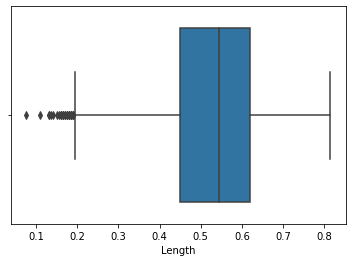

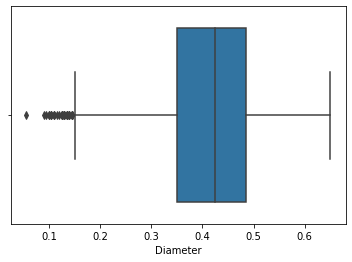

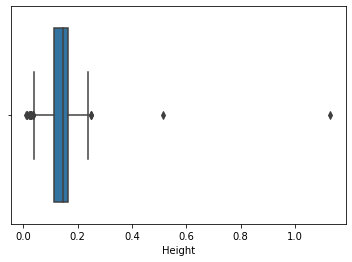

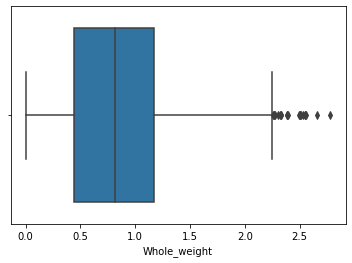

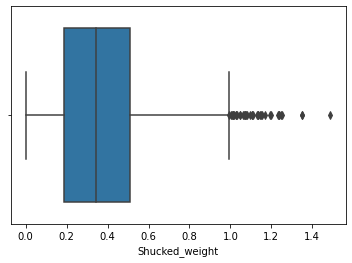

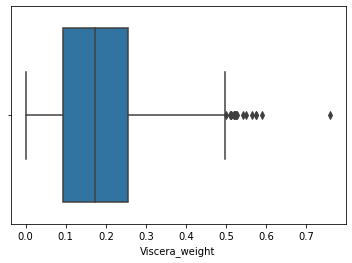

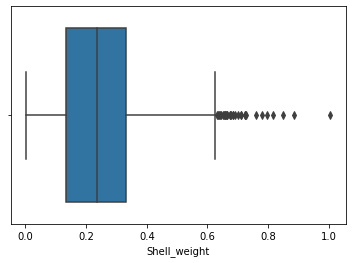

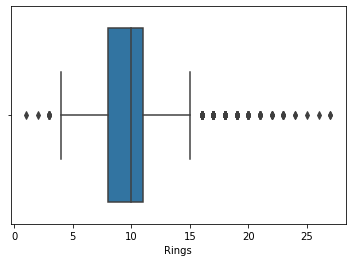

In [15]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.boxplot(df[col])

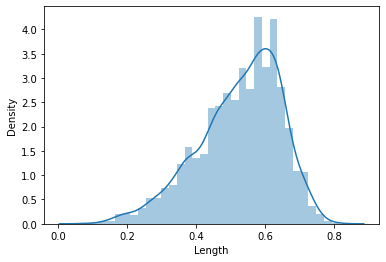

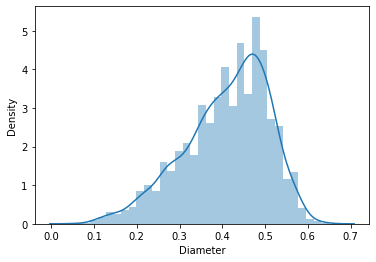

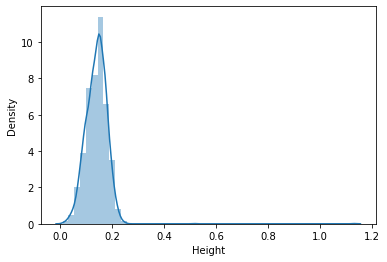

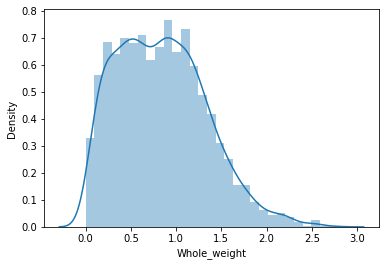

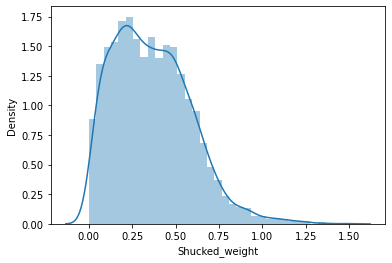

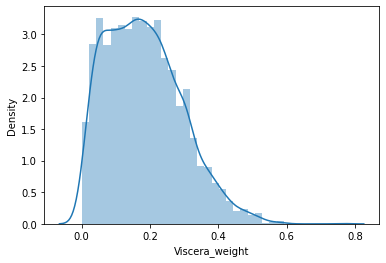

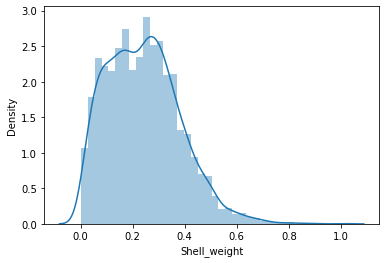

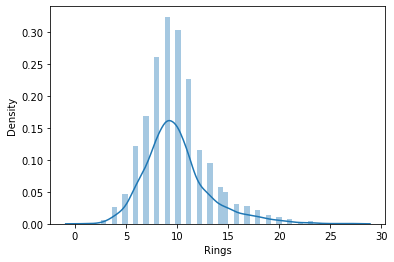

In [16]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.distplot(df[col])

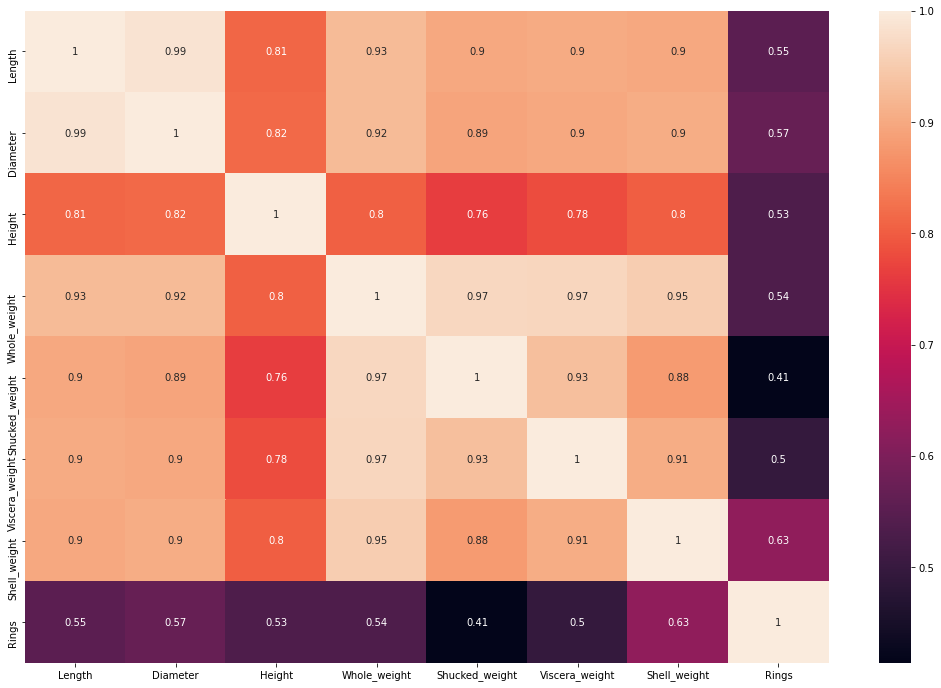

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(corr,data=df,annot=True)


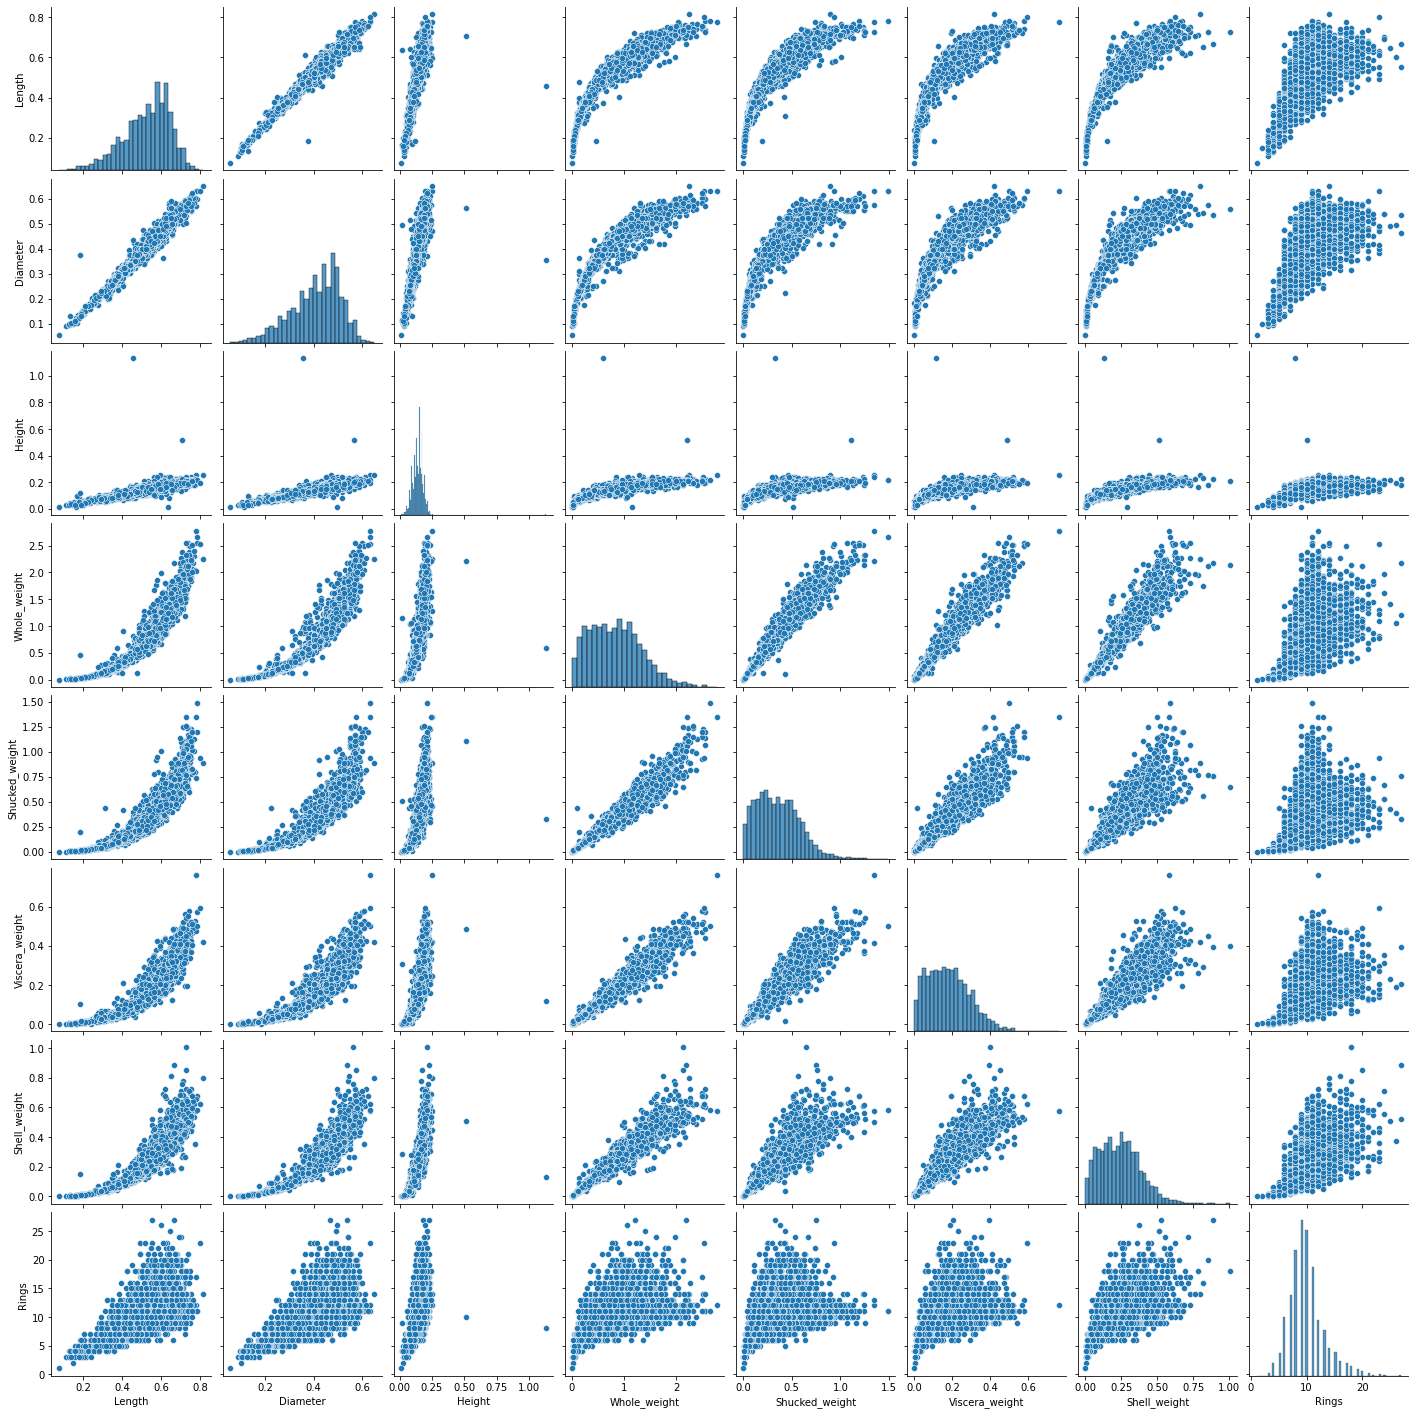

In [19]:
sns.pairplot(df)

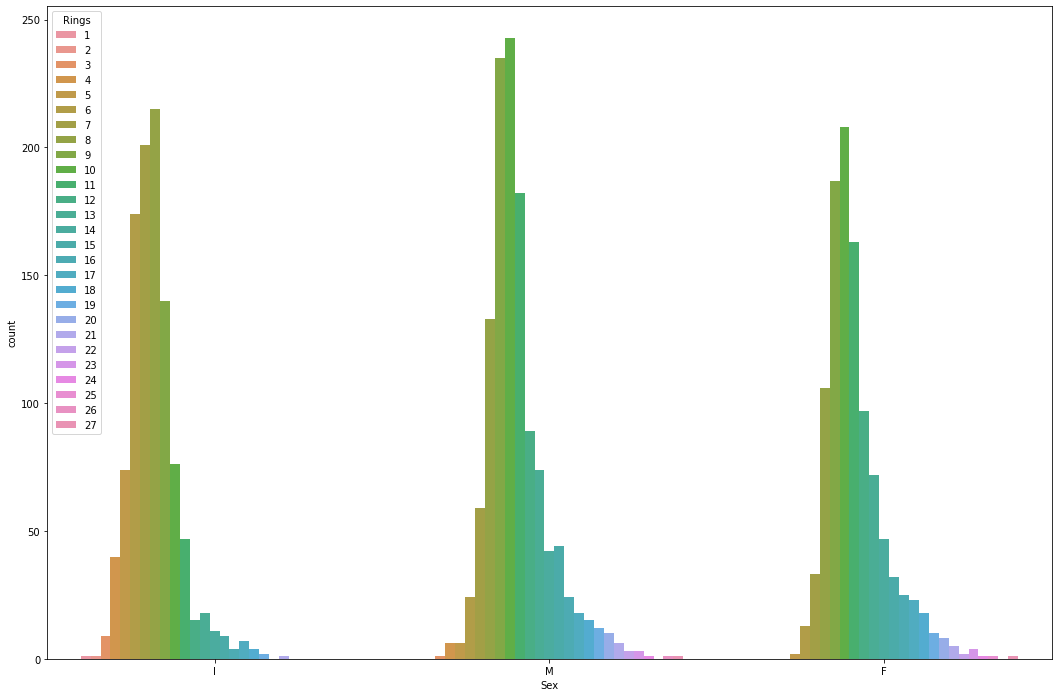

In [20]:
plt.figure(figsize=(18,12))
sns.countplot(data=df,x='Sex',hue='Rings')

# Data pre-processing

In [21]:
num.remove('Rings')

In [22]:
num

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[(num)]=scaler.fit_transform(df[(num)])

In [25]:
df = pd.get_dummies(data=df,columns=['Sex'])

In [26]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,-2.890160,-2.777220,-1.417070,-1.631705,-1.558331,-1.590253,-1.654927,5,0,1,0
1,-2.597786,-2.625480,-2.005431,-1.615500,-1.556099,-1.572139,-1.637046,3,0,1,0
2,1.119550,1.218601,0.701028,1.118157,1.011826,0.266444,1.513455,15,0,0,1
3,1.578996,1.168021,1.407061,2.129985,2.615942,2.295225,1.352532,10,0,0,1
4,0.576569,0.459901,0.348012,0.410182,0.233193,0.252858,0.884070,14,0,0,1


In [27]:
X = df.drop(columns=['Rings'], axis=1)
y = df['Rings']

In [29]:
X.shape

(3339, 10)

In [30]:
y.shape

(3339,)

# Model training and selection

In [31]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
    print('CV Score:', cv_score)

Model Report
RMSE: 2.199425542892842
CV Score: 2.2031671869869185


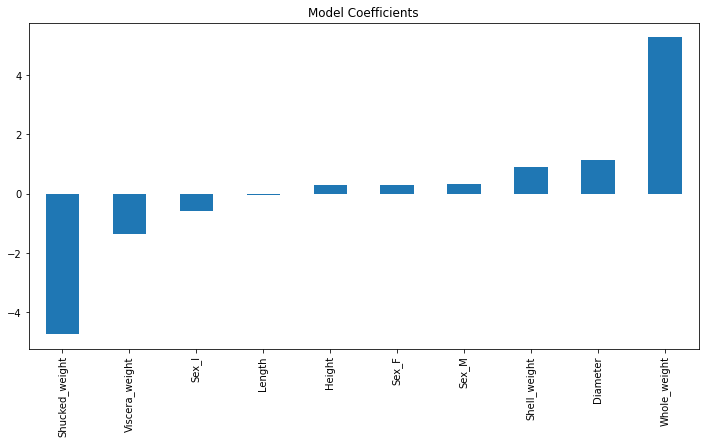

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Model Coefficients")



Model Report
RMSE: 2.1959083246250177
CV Score: 2.2031006640735193


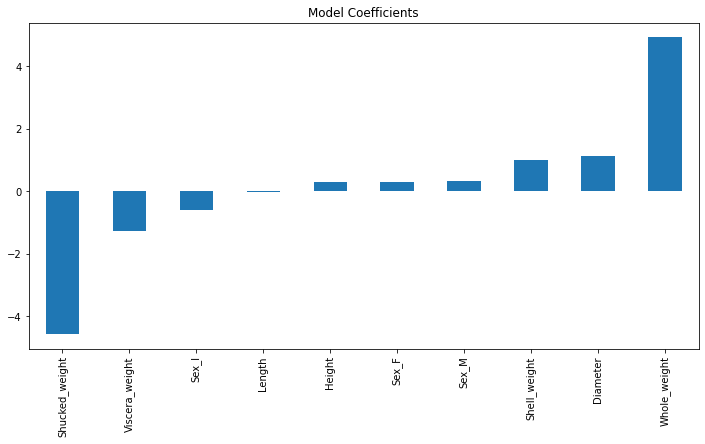

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Model Coefficients")

Model Report
RMSE: 2.745262957753225
CV Score: 2.694035547294233


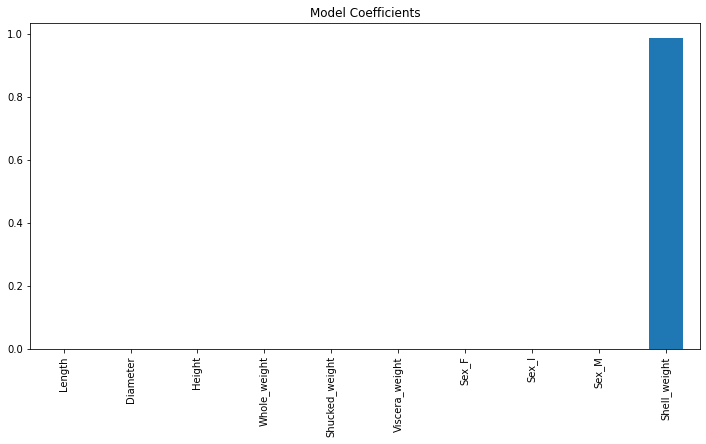

In [39]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Model Coefficients")

Model Report
RMSE: 3.0301874410906846
CV Score: 3.0216183281384295


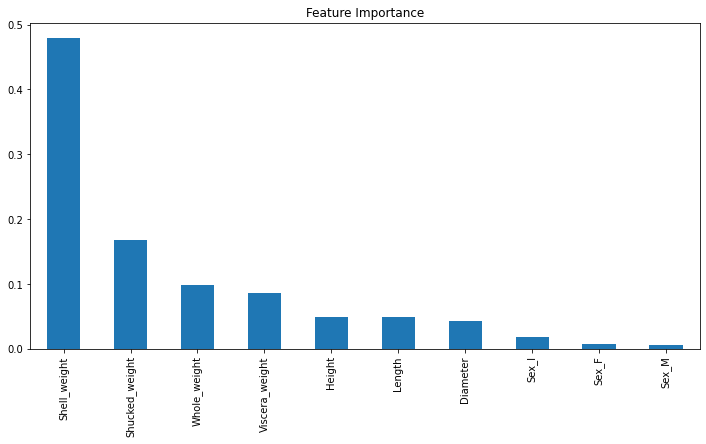

In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Feature Importance")

Model Report
RMSE: 2.1634019284893915
CV Score: 2.217673360930832


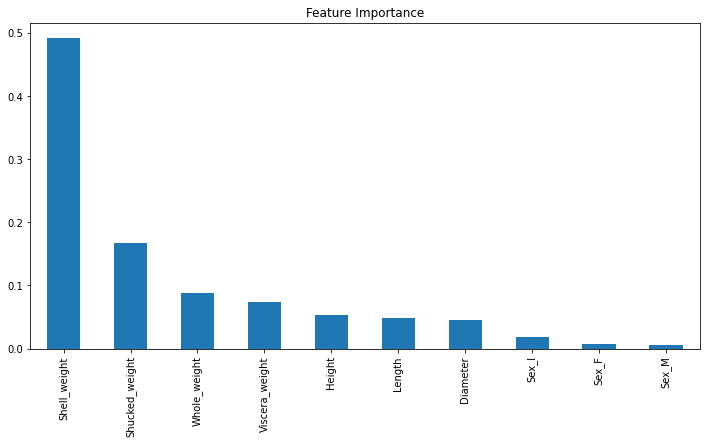

In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Feature Importance")

Model Report
RMSE: 2.213475333924509
CV Score: 2.234784137444552


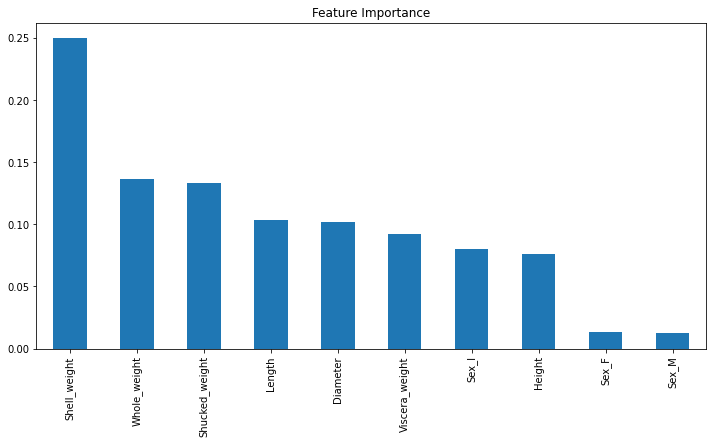

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Feature Importance")

[17:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
RMSE: 2.1421442788282294
CV Score: 2.1635296260218757


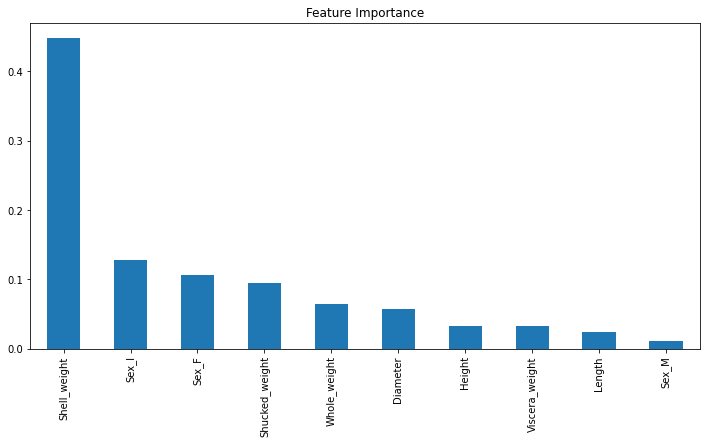

In [44]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Feature Importance")

Model Report
RMSE: 2.148532755035736
CV Score: 2.1620897036381796


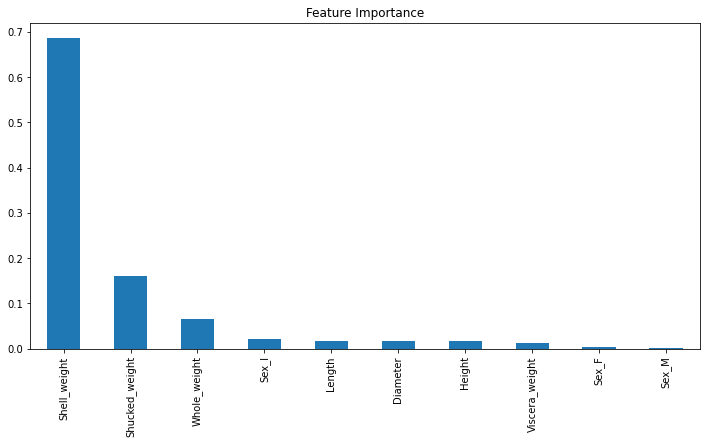

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Feature Importance")

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
model=GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
pred = model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 2.1501433390301252


# Test set prediction

In [59]:
df1=pd.read_csv('abalone_test.csv')

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              836 non-null    int64  
 1   Sex             836 non-null    object 
 2   Length          836 non-null    float64
 3   Diameter        836 non-null    float64
 4   Height          836 non-null    float64
 5   Whole_weight    836 non-null    float64
 6   Shucked_weight  836 non-null    float64
 7   Viscera_weight  836 non-null    float64
 8   Shell_weight    836 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 58.9+ KB


In [61]:
df1.drop(columns='Id',inplace=True)

In [62]:
num2=['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']

In [63]:
df1[(num2)]=scaler.transform(df1[(num2)])

In [64]:
df1 = pd.get_dummies(data=df1,columns=['Sex'])

In [65]:
df1.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.200658,0.156421,0.348012,0.160010,-0.384804,0.547213,0.669507,0,0,1
1,-0.217020,-0.096479,-0.475693,-0.450733,-0.458429,-0.358493,-0.342516,0,1,0
2,0.785408,0.712801,0.348012,0.844690,0.728484,1.733688,0.544345,0,0,1
3,-2.556018,-2.473740,-2.005431,-1.588153,-1.527096,-1.544968,-1.583406,0,1,0
4,0.994247,0.915121,0.818701,1.361239,1.382178,1.747273,0.973471,0,0,1


In [66]:
Z=df1.values

In [67]:
Final_pred = model.predict(Z)

In [68]:
prediction = pd.DataFrame(Final_pred).to_csv('submission.csv')